In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

#The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
*ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*INDUS - proportion of non-retail business acres per town.
*CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*NOX - nitric oxides concentration (parts per 10 million)
*RM - average number of rooms per dwelling
*AGE - proportion of owner-occupied units built prior to 1940
*DIS - weighted distances to five Boston employment centres
*RAD - index of accessibility to radial highways
*TAX - full-value property-tax rate per $10,000



* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Implementation of Gradient Boosting Algorithm

In [ ]:
#Imporitng necessary packages
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [ ]:
#Load data - Reading Boston Data
#Extract features (X) and labels (y)
X = df.iloc[:, :13]  # Features (first 13 columns)
y = df.iloc[:, -1]   # Labels (last column - Medain value)

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=31)

# Model training and evaluation

In [ ]:
# Create gradientboost Regressor object
#n_estimators - Number of weak learners to trian iteratively
#learning_rate - It contributes to the weights of the weak learners. it uses 1 as default value
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)
#Train gradientboost regressor
model=gradientregressor.fit(X_train,y_train)
#Predict the response for the test dataset
y_pred=model.predict(X_test)
r2_score(y_pred,y_test)

0.7132479047454454

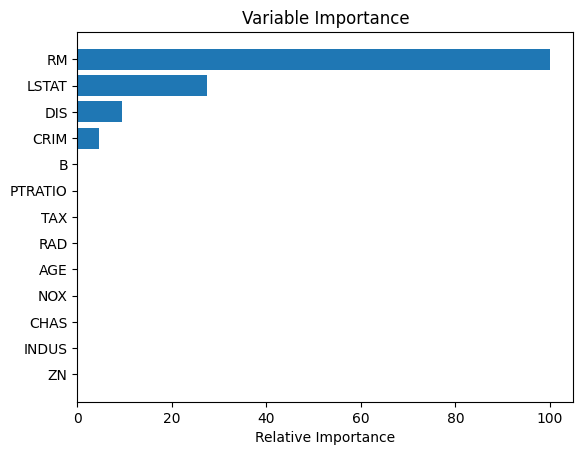

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importance =  model.feature_importances_

#make importances relative to max importance
feature_importance=100.0 * (feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Tuning the hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.01,0.10,0.05],'n_estimators':[100,150,200,250],'max_depth':[1,2,4]}

tuning = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=LR,scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 250},
 0.8841838586861972)

# Gradient Boosting Model Devlopment

In [ ]:
gradientregressor = GradientBoostingRegressor(max_depth=4,n_estimators=250,learning_rate=0.15)
model=gradientregressor.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_pred,y_test)

0.8055219822213339

# Decision Tree Visualisation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
df1=DecisionTreeRegressor(max_depth=2)

In [ ]:
df1.fit(df.iloc[:,0:13].values,df['MEDV'].values)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[5] <= 6.941\nsquared_error = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(0.25, 0.5, 'x[12] <= 14.4\nsquared_error = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(0.125, 0.16666666666666666, 'squared_error = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(0.375, 0.16666666666666666, 'squared_error = 19.276\nsamples = 175\nvalue = 14.956'),
 Text(0.75, 0.5, 'x[5] <= 7.437\nsquared_error = 79.729\nsamples = 76\nvalue = 37.238'),
 Text(0.625, 0.16666666666666666, 'squared_error = 41.296\nsamples = 46\nvalue = 32.113'),
 Text(0.875, 0.16666666666666666, 'squared_error = 36.628\nsamples = 30\nvalue = 45.097')]

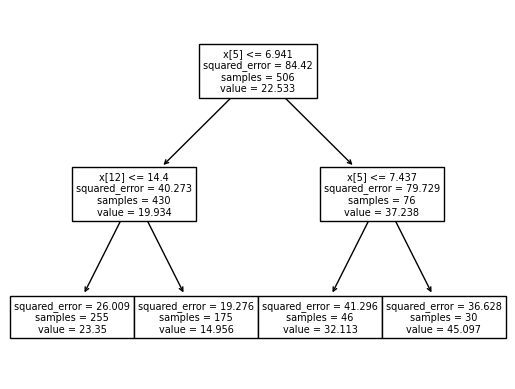

In [ ]:
from sklearn.tree import plot_tree
plot_tree(df1)
#The decision tree selects features for splitting based on how well they help to partition
#the data into subsets that reduce the squared error.
#The algorithm evaluates different features and thresholds to find the split that minimizes
#the mean squared error in each node.
#Selected features
#RM - average number of rooms per dwelling - x[5] 6th col
#LSTAT - % lower status of the population - x[12] 13th col

In [ ]:
df2=DecisionTreeRegressor(max_depth=3)
df2.fit(df.iloc[:,0:13].values,df['MEDV'].values)

DecisionTreeRegressor(max_depth=3)

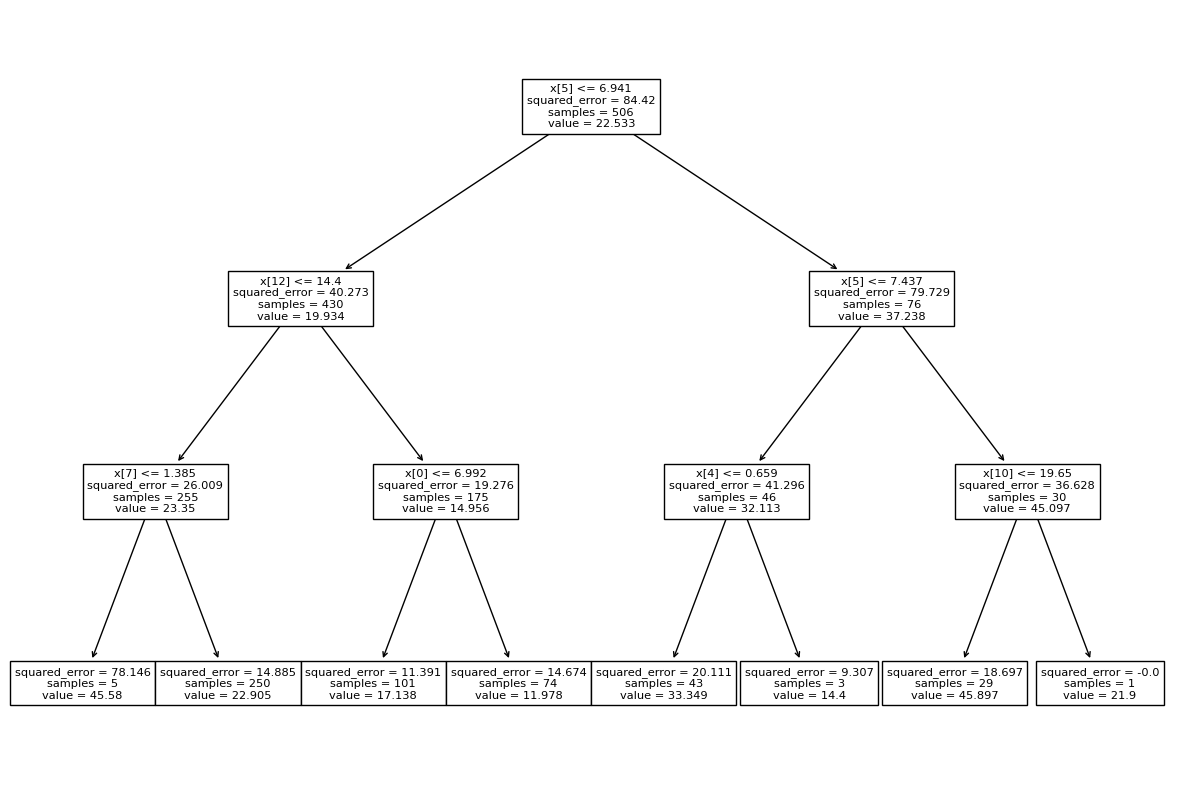

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(df2)
plt.show()

In [ ]:
df2=DecisionTreeRegressor(max_depth=4)
df2.fit(df.iloc[:,0:13].values,df['MEDV'].values)

DecisionTreeRegressor(max_depth=4)

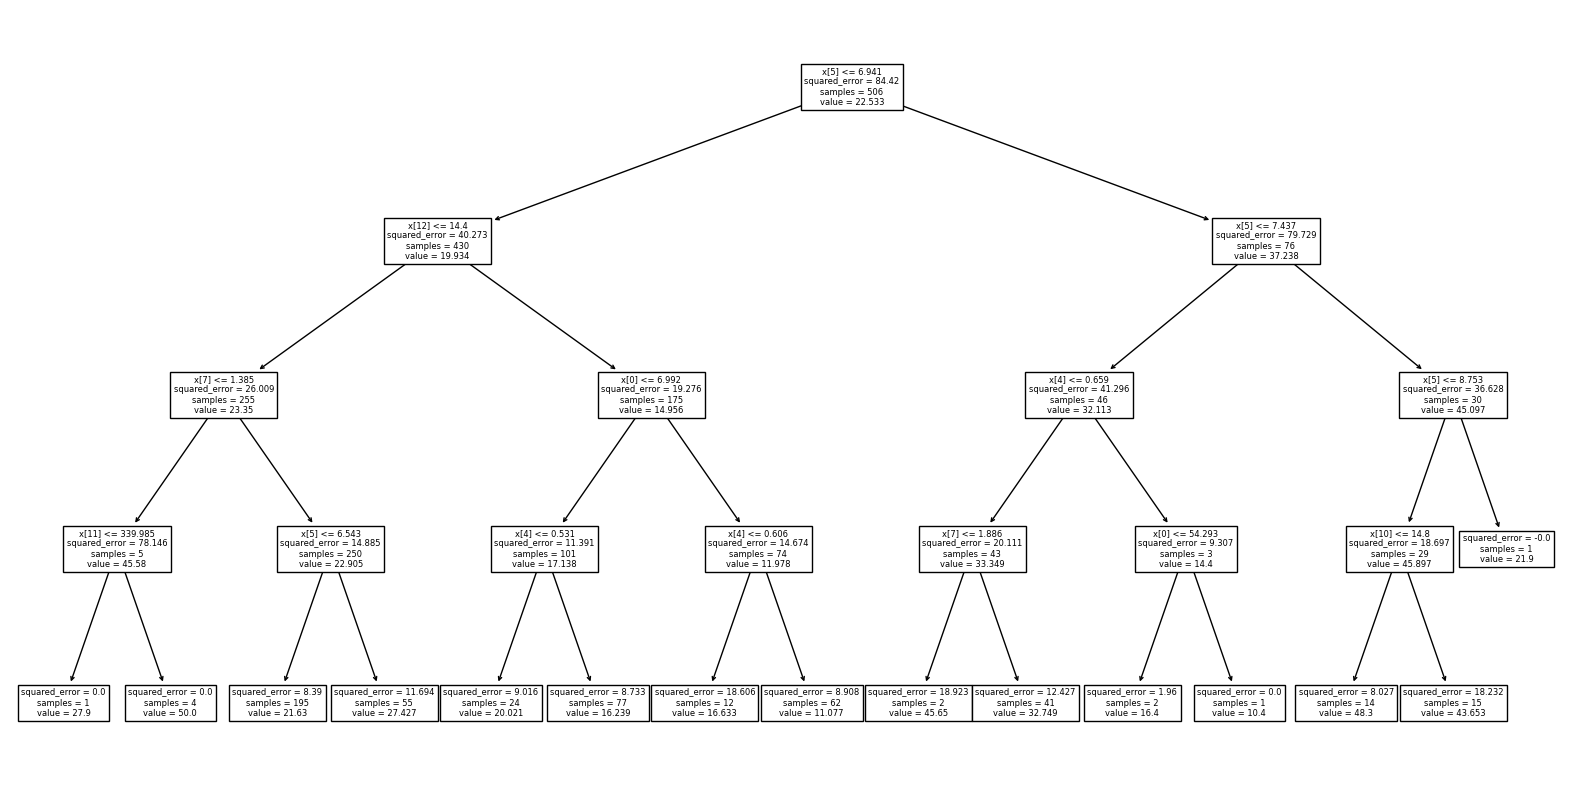

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(df2)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.01,0.10,0.05],'n_estimators':[100,150,200,250],'max_depth':[1,2,4,5,6,7]}

tuning = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=LR,scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 150},
 0.8756567559889673)

In [ ]:
gradientregressor = GradientBoostingRegressor(max_depth=4,n_estimators=150,learning_rate=0.15)
model=gradientregressor.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_pred,y_test)

0.797763670421337